<a href="https://colab.research.google.com/github/saramartinezudea/PruebaGitHub/blob/master/Trabajo_de_acompa%C3%B1amiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from scipy import stats
import numpy as np

url = 'https://www.datos.gov.co/resource/3t73-n4q9.json'
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)

In [2]:
# Análisis exploratorio inicial

print("=== Estructura del dataset ===")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}\n")
print("Primeras 5 filas:")
display(df.head())

=== Estructura del dataset ===
Filas: 1000, Columnas: 9

Primeras 5 filas:


,principio_activo,unidad_de_dispensacion,concentracion,unidad_base,nombre_comercial,fabricante,precio_por_tableta,factoresprecio,numerofactor
0,Midazolam,Ampolla,Midazolam 15 mg,ml,Dormicum,Siegfried,11199.8,Alto,3
1,Acido Valproico,Tableta,Divalproato Sodico 500 mg,mg,Valcote,Lafrancol,3752.866667,Medio,2
2,Acido Valproico,Tableta,Divalproato Sodico 500 mg,mg,Valcote,Lafrancol,1777.266522,Medio,2
3,Fluoxetina,Capsula,Fluoxetina 20 mg,mg,Fluoxetina,Genfar,329.295281,Medio,2
4,Proximetacaina,Frasco,Proximetacaina 5 mg,ml,Alcaine,Alcon,64184.74576,Medio,2


In [6]:
print("\nInformación del dataset:")
display(df.info())

print("\nEstadísticas descriptivas:")
display(df.describe(include='all'))


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   principio_activo        1000 non-null   object
 1   unidad_de_dispensacion  1000 non-null   object
 2   concentracion           1000 non-null   object
 3   unidad_base             1000 non-null   object
 4   nombre_comercial        1000 non-null   object
 5   fabricante              1000 non-null   object
 6   precio_por_tableta      1000 non-null   object
 7   factoresprecio          1000 non-null   object
 8   numerofactor            1000 non-null   object
dtypes: object(9)
memory usage: 70.4+ KB


None


Estadísticas descriptivas:


,principio_activo,unidad_de_dispensacion,concentracion,unidad_base,nombre_comercial,fabricante,precio_por_tableta,factoresprecio,numerofactor
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,326,18,466,7,427,124,979,3,3
top,Levotiroxina Sodica,Tableta,Clotrimazol 1 g,mg,Synthroid,Genfar,1750,Medio,2
freq,16,406,10,530,16,68,3,550,550


In [13]:
# Convertir precio_por_tableta a numérico
df['precio_por_tableta'] = pd.to_numeric(df['precio_por_tableta'].astype(str).str.replace(',', '.'), errors='coerce')
df['numerofactor'] = pd.to_numeric(df['numerofactor'].astype(str).str.replace(',', '.'), errors='coerce')

In [14]:
print("\nInformación del dataset:")
display(df.info())

print("\nEstadísticas descriptivas:")
display(df.describe(include='all'))


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   principio_activo        1000 non-null   object 
 1   unidad_de_dispensacion  1000 non-null   object 
 2   concentracion           1000 non-null   object 
 3   unidad_base             1000 non-null   object 
 4   nombre_comercial        1000 non-null   object 
 5   fabricante              1000 non-null   object 
 6   precio_por_tableta      1000 non-null   float64
 7   factoresprecio          1000 non-null   object 
 8   numerofactor            1000 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 70.4+ KB


None


Estadísticas descriptivas:


,principio_activo,unidad_de_dispensacion,concentracion,unidad_base,nombre_comercial,fabricante,precio_por_tableta,factoresprecio,numerofactor
count,1000,1000,1000,1000,1000,1000,1.000000e+03,1000,1000.000000
unique,326,18,466,7,427,124,NaN,3,NaN
top,Levotiroxina Sodica,Tableta,Clotrimazol 1 g,mg,Synthroid,Genfar,NaN,Medio,NaN
freq,16,406,10,530,16,68,NaN,550,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,4.250293e+04,NaN,2.080000
std,NaN,NaN,NaN,NaN,NaN,NaN,3.128058e+05,NaN,0.666366
min,NaN,NaN,NaN,NaN,NaN,NaN,4.155779e-01,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.324054e+02,NaN,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.810028e+03,NaN,2.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.348724e+04,NaN,3.000000


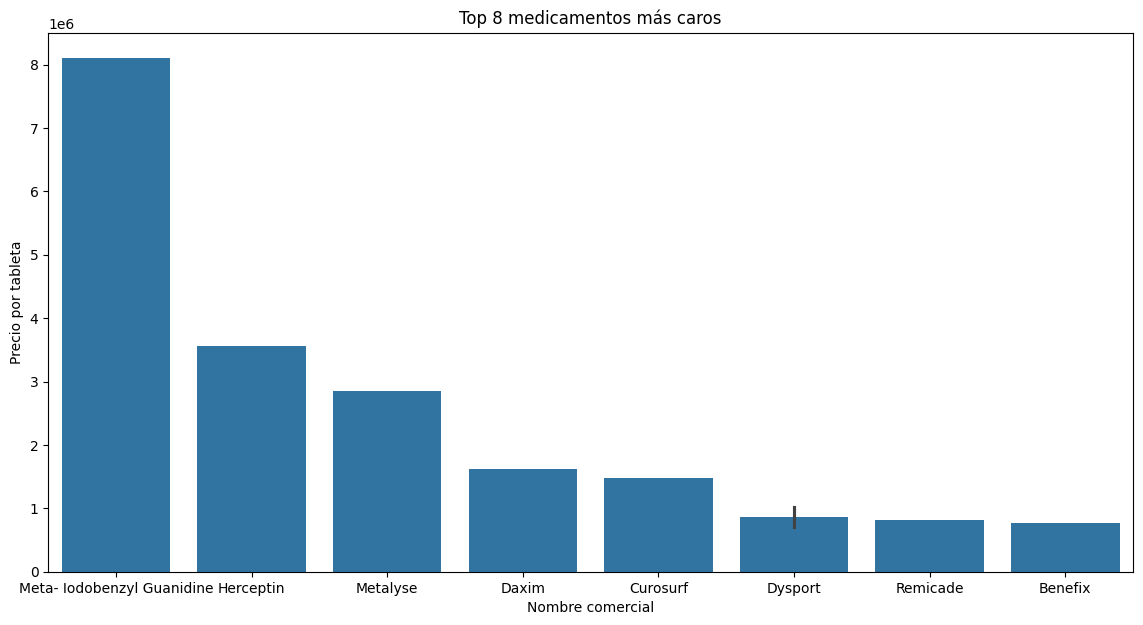

In [16]:
# Top 8 medicamentos más caros
top_costosos = df.sort_values('precio_por_tableta', ascending=False).head(10)
plt.figure(figsize=(14, 7))
sns.barplot(x='nombre_comercial', y='precio_por_tableta', data=top_costosos)
plt.title('Top 8 medicamentos más caros')
plt.xlabel('Nombre comercial')
plt.ylabel('Precio por tableta',)
plt.show()

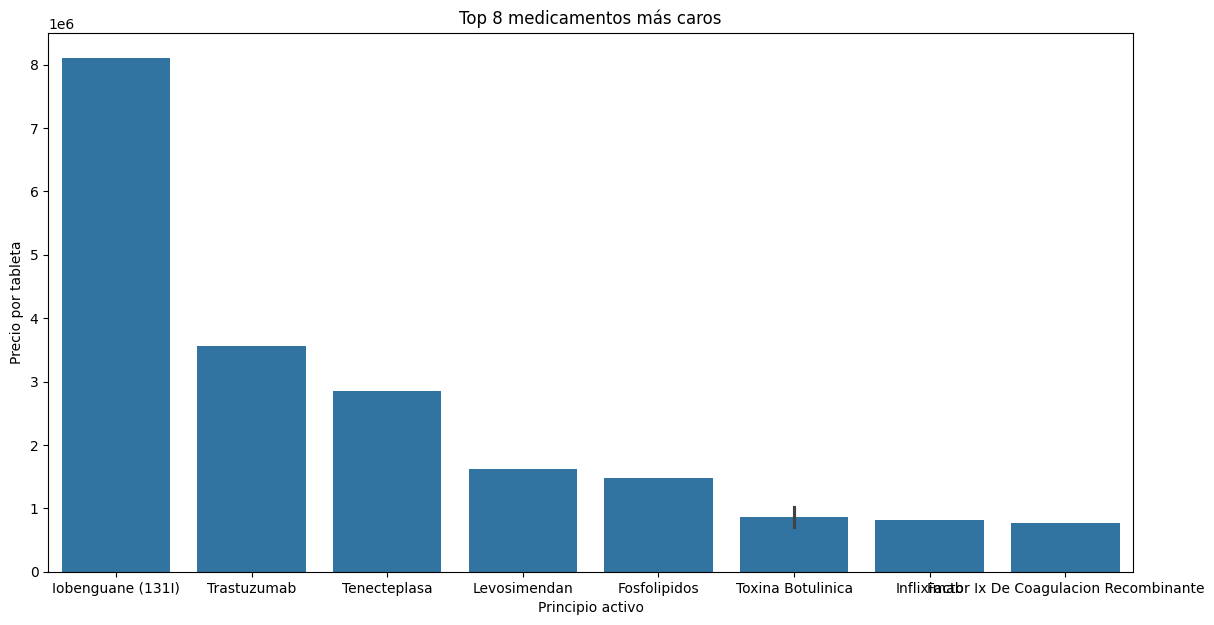

In [17]:
# Top 8 medicamentos más caros
top_costosos = df.sort_values('precio_por_tableta', ascending=False).head(10)
plt.figure(figsize=(14, 7))
sns.barplot(x='principio_activo', y='precio_por_tableta', data=top_costosos)
plt.title('Top 8 medicamentos más caros')
plt.xlabel('Principio activo')
plt.ylabel('Precio por tableta',)
plt.show()

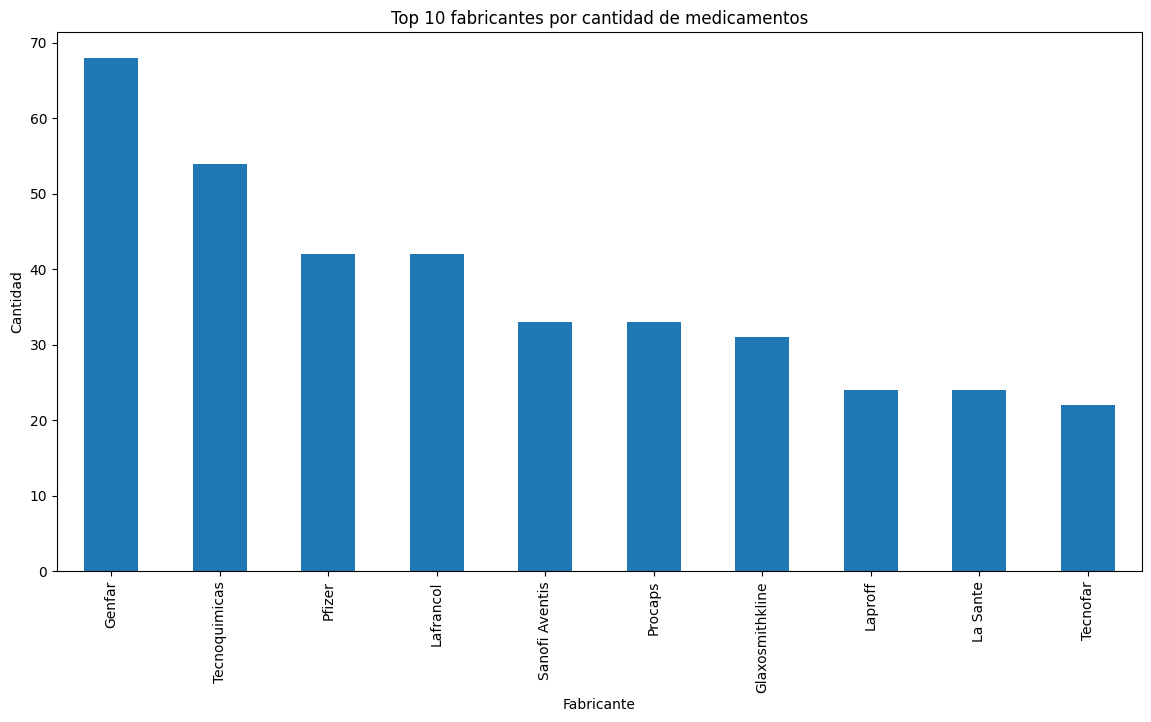

In [20]:
# Análisis por fabricante
fabricantes = df['fabricante'].value_counts().head(10)
plt.figure(figsize=(14, 7))
fabricantes.plot(kind='bar')
plt.title('Top 10 fabricantes por cantidad de medicamentos')
plt.xlabel('Fabricante')
plt.ylabel('Cantidad')
plt.show()

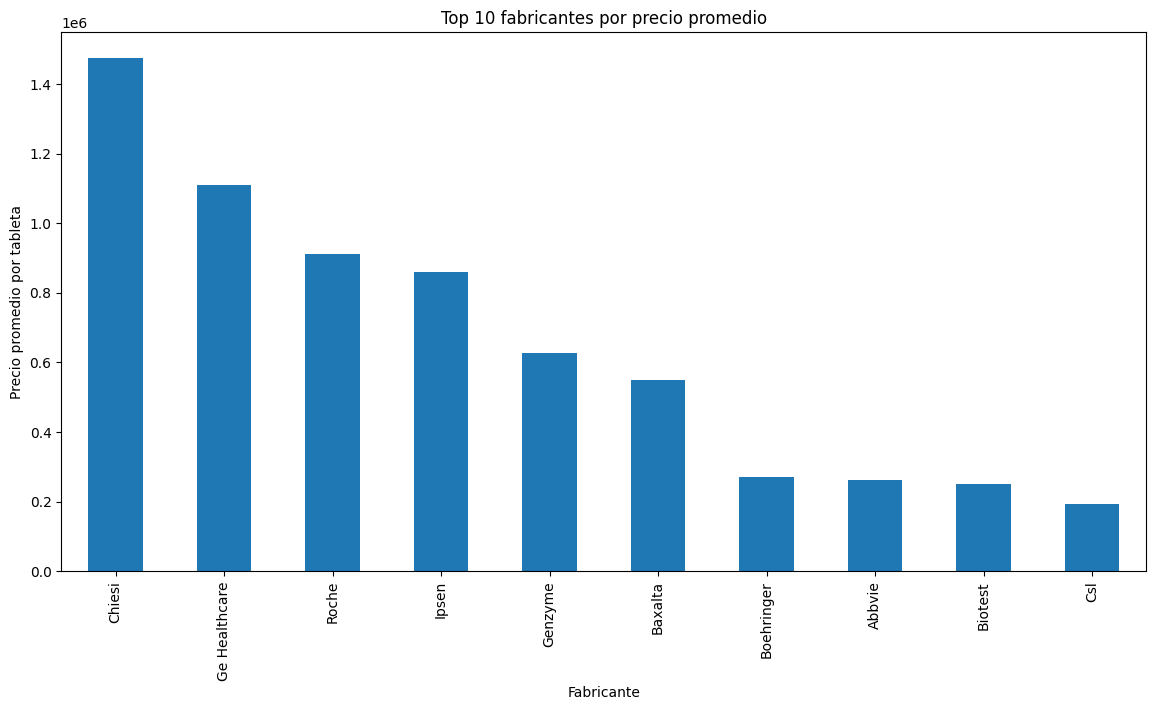

In [21]:
# Precio promedio mas caros por fabricante
precio_fabricante = df.groupby('fabricante')['precio_por_tableta'].mean().sort_values(ascending=False).head(10)
precio_fabricante.plot(kind='bar', figsize=(14, 7))
plt.title('Top 10 fabricantes por precio promedio')
plt.xlabel('Fabricante')
plt.ylabel('Precio promedio por tableta')
plt.show()

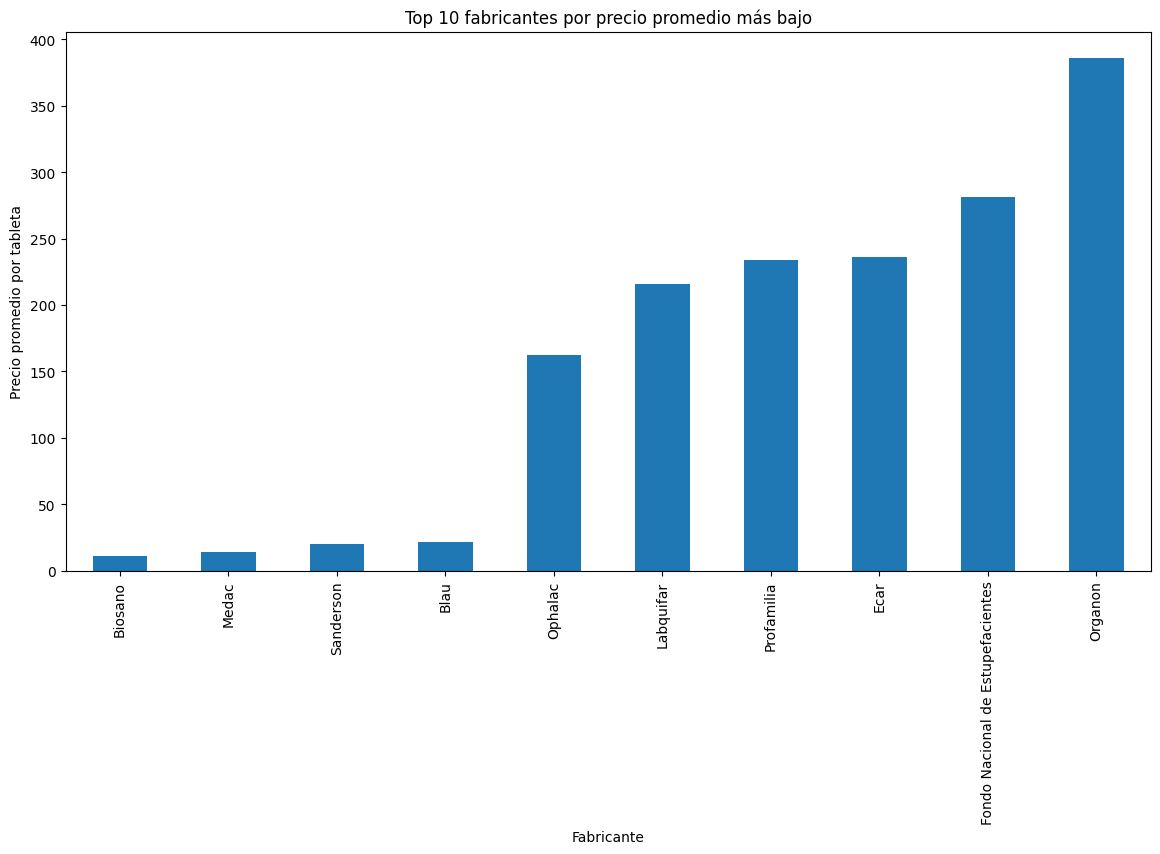

In [22]:
# Precio promedio por fabricante (los 10 más baratos)
precio_fabricante = df.groupby('fabricante')['precio_por_tableta'].mean().sort_values(ascending=True).head(10)
precio_fabricante.plot(kind='bar', figsize=(14, 7))
plt.title('Top 10 fabricantes por precio promedio más bajo')
plt.xlabel('Fabricante')
plt.ylabel('Precio promedio por tableta')
plt.show()

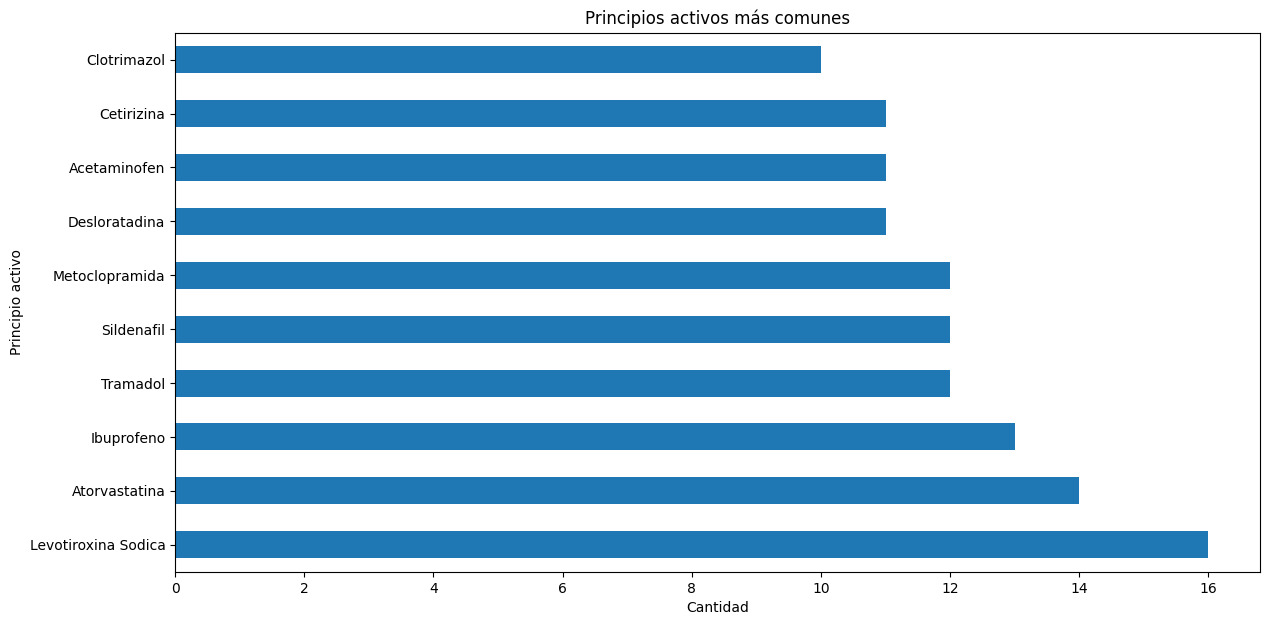

In [25]:
# Análisis de principios activos
principios_activos = df['principio_activo'].value_counts().head(10)
plt.figure(figsize=(14, 7))
principios_activos.plot(kind='barh')
plt.title('Principios activos más comunes')
plt.xlabel('Cantidad')
plt.ylabel('Principio activo')
plt.show()

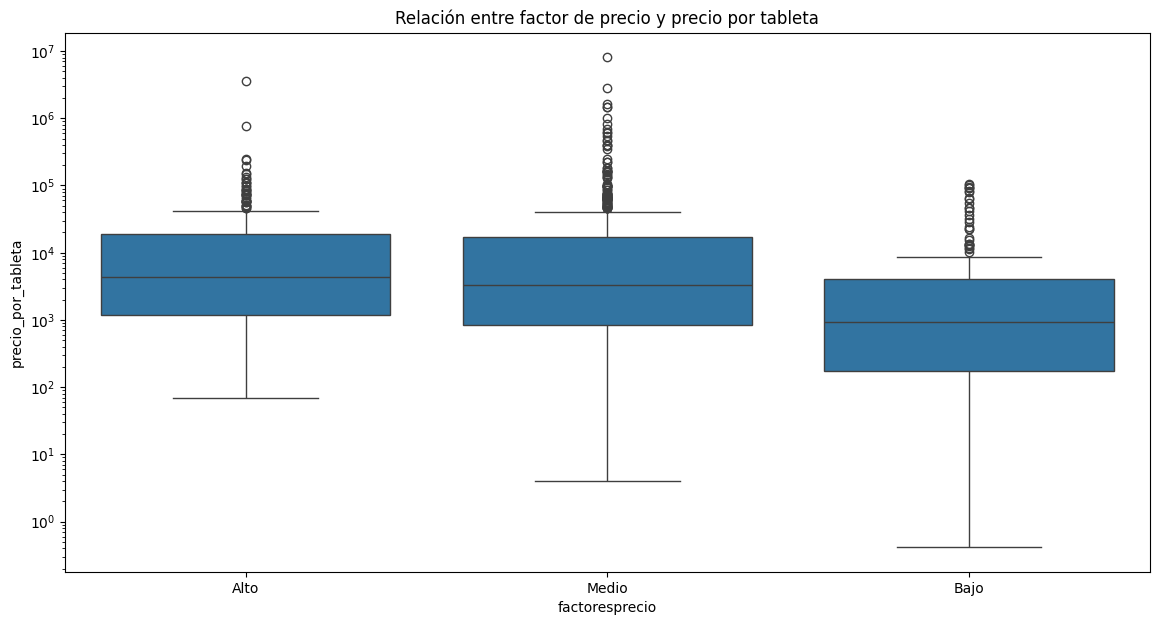

In [ ]:
# Precio vs Factor de precio
plt.figure(figsize=(14, 7))
sns.boxplot(x='factoresprecio', y='precio_por_tableta', data=df)
plt.title('Relación entre factor de precio y precio por tableta')
plt.yscale('log')  # Escala logarítmica para mejor visualización
plt.show()


In [26]:
# Detección de outliers usando Z-score
from scipy import stats

# Ensure 'precio_por_tableta' is numeric
df['precio_por_tableta'] = pd.to_numeric(df['precio_por_tableta'], errors='coerce')

# Calculate z-scores
z_scores = stats.zscore(df['precio_por_tableta'].dropna())

# Get indices of outliers using .to_numpy().nonzero()
outlier_indices = (z_scores > 3).to_numpy().nonzero()[0]

outliers = df.iloc[outlier_indices]
print("\nOutliers en precios:")
display(outliers[['nombre_comercial', 'precio_por_tableta', 'fabricante']])


Outliers en precios:


,nombre_comercial,precio_por_tableta,fabricante
244,Herceptin,3560621.000,Roche
266,Meta- Iodobenzyl Guanidine,8096666.667,Ge Healthcare
313,Curosurf,1475227.000,Chiesi
314,Curosurf,1475227.000,Chiesi
507,Dysport,1014406.686,Ipsen
862,Daxim,1614836.990,Abbvie
993,Metalyse,2856140.561,Boehringer
